In [2]:
library(nat)
library(nat.nblast)

In [44]:
write.neurons(kcs20, "/usr/people/jingpeng/.julia/dev/RealNeuralNetworks/asset/kcs20/", files=paste0(names(kcs20)), format="swc", Force=TRUE)

In [41]:
neuron1 = kcs20[['FruMARCM-M001205_seg002']]
neuron2 = kcs20[['GadMARCM-F000122_seg001']]
# WeightedNNBasedLinesetMatching(dotprops(neuron1), dotprops(neuron2))
# WeightedNNBasedLinesetMatching(neuron1, neuron2)

score = nblast(neuron1, neuron2)
score

[1] 743.0257

In [4]:
scores=nblast(kcs20[['GadMARCM-F000142_seg002']], kcs20)
scores

FruMARCM-M001205_seg002 GadMARCM-F000122_seg001 GadMARCM-F000050_seg001 
              -251.4999               -262.2352                480.4146 
GadMARCM-F000142_seg002 FruMARCM-F000270_seg001 FruMARCM-F001115_seg002 
              4043.1766                254.7516               -520.2581 
FruMARCM-M001051_seg002 GadMARCM-F000423_seg001 ChaMARCM-F000586_seg002 
               140.8164               1772.8506               1914.8224 
FruMARCM-M001339_seg001 GadMARCM-F000476_seg001 FruMARCM-F000085_seg001 
               433.9340                313.2021                713.2106 
FruMARCM-F000706_seg001 FruMARCM-M000842_seg002 FruMARCM-F001494_seg002 
               204.2116                196.4543                481.4737 
FruMARCM-F000188_seg001 GadMARCM-F000071_seg001 FruMARCM-M000115_seg001 
               404.0470                448.1516                853.8108 
GadMARCM-F000442_seg002 FruMARCM-F001929_seg001 
              1007.4565                604.4071

GadMARCM-F000142_seg002 ChaMARCM-F000586_seg002 GadMARCM-F000423_seg001 
              4043.1766               1914.8224               1772.8506 
GadMARCM-F000442_seg002 FruMARCM-M000115_seg001 FruMARCM-F000085_seg001 
              1007.4565                853.8108                713.2106 
FruMARCM-F001929_seg001 FruMARCM-F001494_seg002 GadMARCM-F000050_seg001 
               604.4071                481.4737                480.4146 
GadMARCM-F000071_seg001 FruMARCM-M001339_seg001 FruMARCM-F000188_seg001 
               448.1516                433.9340                404.0470 
GadMARCM-F000476_seg001 FruMARCM-F000270_seg001 FruMARCM-F000706_seg001 
               313.2021                254.7516                204.2116 
FruMARCM-M000842_seg002 FruMARCM-M001051_seg002 FruMARCM-M001205_seg002 
               196.4543                140.8164               -251.4999 
GadMARCM-F000122_seg001 FruMARCM-F001115_seg002 
              -262.2352               -520.2581

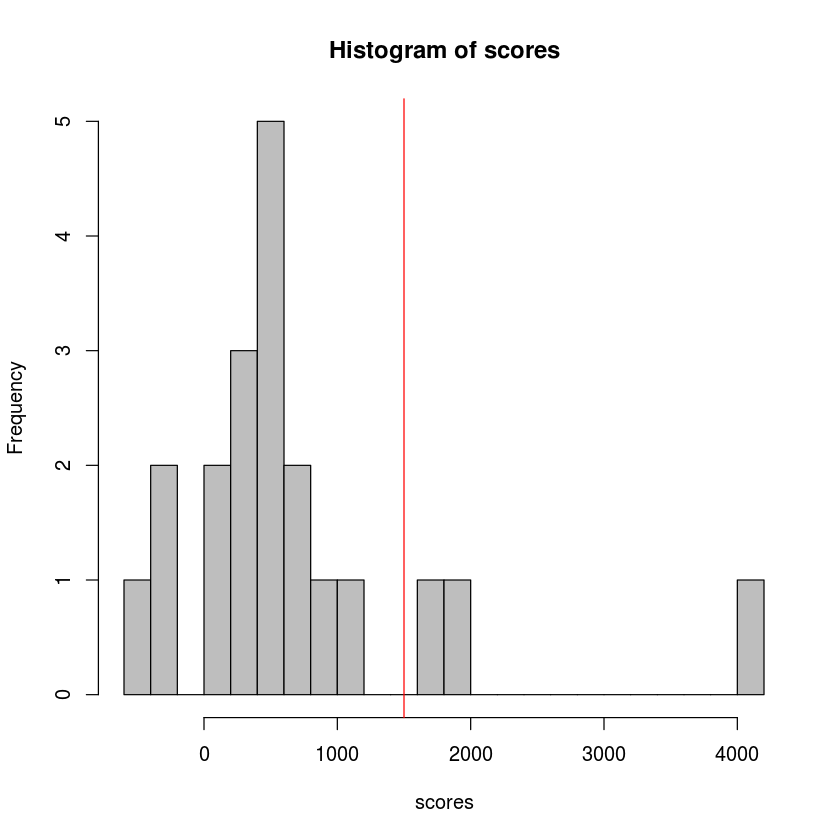

In [19]:
sort(scores, decreasing = TRUE);
hist(scores, breaks=25, col='grey');
abline(v=1500, col='red');

  |======================================================================| 100%


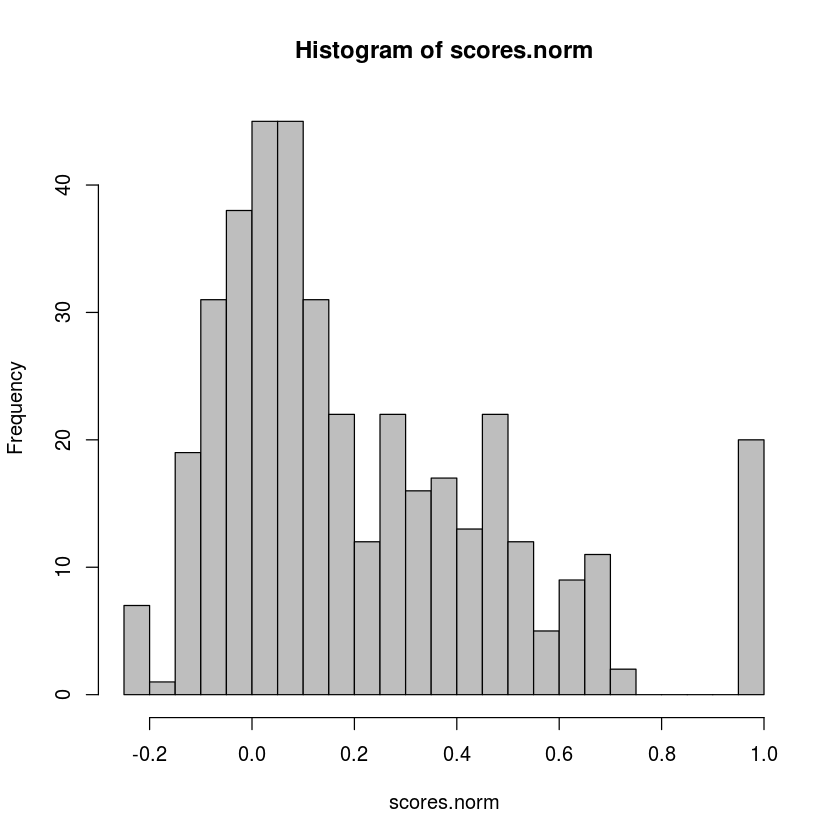

In [21]:
# normalised scores (i.e. self match = 1) of all neurons vs each other
# note use of progress bar
scores.norm=nblast(kcs20, kcs20, normalised = TRUE, .progress="text")
hist(scores.norm, breaks=25, col='grey')

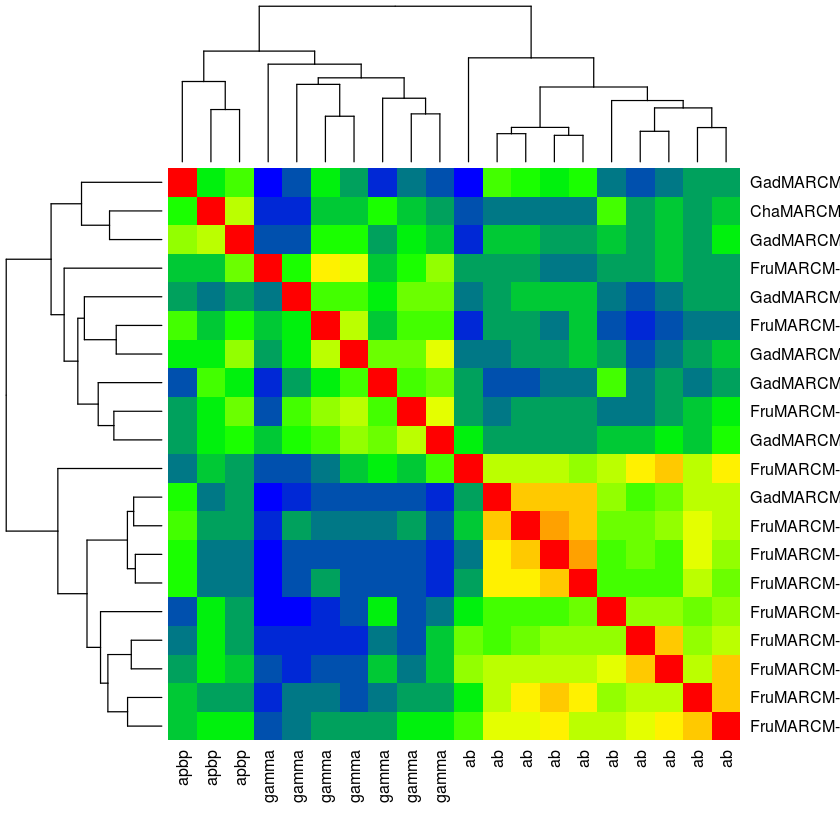

In [22]:
# produce a heatmap from normalised scores
jet.colors <- colorRampPalette( c("blue", "green", "yellow", "red") )
heatmap(scores.norm, labCol = with(kcs20,type), col=jet.colors(20), symm = TRUE)

In [23]:
## Not run: ------------------------------------
# # Parallelise NBLASTing across 4 cores using doMC package
# library(doMC)
# registerDoMC(4)
# scores.norm2=nblast(kcs20, kcs20, normalised=TRUE, .parallel=TRUE)
# stopifnot(all.equal(scores.norm2, scores.norm))
## ---------------------------------------------